<a href="https://colab.research.google.com/github/sagargahalod/Misc/blob/master/some_Practicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam (The Real One)

![texto alternativo](https://cache.careers360.mobi/media/presets/860X430/article_images/2020/8/25/Kar-supple-time-table.jpg)




# Instructions

This is an open book examination: you may refer to the lecture notes, homework solutions, library documentation, technical books and online resources. However, you are not allowed to give or receive aid from other people during the examination. Clearly, plagiarism (such as straight copying of text without appropriate attribution) is a violation of the BBS Honour code. **In case you re-use code, please acknowledge the author/source.**

If you have a question during the online part, please pose it on the chat and it will be publicly answered.

Please prepare your answers inside this notebook, adding your name and surname to the filename to avoid duplicates.


**Relax and very good luck!**

# Grading & Bonus Points

All the questions in the theoretical part will be graded between 0 and 100, and then averaged to obtain the score of this section. Similarly, all tasks/activities in the practical part of the exam will be graded between 0 and 100, and then averaged to obtain the score of this section. Your final exam score will obtained by weighting 40% the theoretical and 60% the practical part. 

To simplify the logistics, the bonus points you have accumulated in this period will be added to your final exam score with a weight of 10% each (note that this criterion is better for you than adding the points to a single question).

For example, if you obtained 80 in the theoretical part, 70 in the practical part, and you have two bonuses, one of 70 and one of 100, your final exam score would be


In [ ]:
fm = 0.4*80 + 0.6*70 + 0.1*70 + 0.1*100
print(round(fm))

91


Grades over 100% will be converted to 30. These students will receive a "cum laude" recognition.

# Practical Part (60%)

## SVMs

The code below downloads data from an speaker recognition problem in which we have 11 mutually classes we want to identify using d=10 numeric attributes. About a half of the original observations have been reserved for training and the other half for testing. You will have access to the labels of the train set only.



### **Task 1**


Propose a methodology based on SVMs to recognize the 11 types of sounds. **Include in your pipeline at least a method to select the model's hyperparameters and a method to estimate its future performance**. You will be assessed considering: (i) the motivation you present for your pipeline and choices, (ii) the F1-score of your model on a test set reserved for evaluation, (iii) the match between the accuracy you predict and the actual accuracy of the model on the test set. 

- Remember to include brief but convincing arguments to explain your decisions.

- Besides the code, upload predictions for the test data. Upload your predictions in a csv file with only one column where i-th row corresponds to the prediction of the i-th test point. Please use the following format for the name of the file with the predictions: BBS21-ML-Exam-SVM-Name-Surname.csv (first name, first surname, without spaces). 

In [ ]:
!wget --backups=1 http://www.inf.utfsm.cl/~jnancu/x_exam_train.csv
!wget --backups=1 http://www.inf.utfsm.cl/~jnancu/y_exam_train.csv
!wget --backups=1 http://www.inf.utfsm.cl/~jnancu/x_exam_test.csv


--2021-04-07 05:36:08--  http://www.inf.utfsm.cl/~jnancu/x_exam_train.csv
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.inf.utfsm.cl/~jnancu/x_exam_train.csv [following]
--2021-04-07 05:36:09--  https://www.inf.utfsm.cl/~jnancu/x_exam_train.csv
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51940 (51K) [application/octet-stream]
Failed to rename x_exam_train.csv to x_exam_train.csv.1: (2) No such file or directory
Saving to: ‘x_exam_train.csv’

x_exam_train.csv    100%[===================>]  50.72K   120KB/s    in 0.4s    

2021-04-07 05:36:10 (120 KB/s) - ‘x_exam_train.csv’ saved [51940/51940]

URL transformed to HTTPS due to an HSTS policy
--2021-04-07 05:36:10--  https://www.inf.utfsm.cl/~jnancu/y_exam_train.csv
Res

The code below loads the data into numpy arrays and pandas dataframes. Feel free to use the tool/format with which you feel more comfortable. 


In [ ]:
import numpy as np
import pandas as pd

dx_train = pd.read_csv('x_exam_train.csv',header=0)
dy_train = pd.read_csv('y_exam_train.csv',header=0)

df_train = dx_train
df_train['y'] = dy_train

x_train = dx_train.values
y_train = dy_train.values[:,0]

print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10 11]


 Decided to stick with Dataframe format
Its been observed that there is additional Categorical column in dx_train file,
Since we are already provided with the seprate dy_train file with corresponding Categories(labels) dx_train, this extra column would be extracted for now.

In [ ]:
#Decided to stick with Dataframe format Its been observed that there is additional Categorical column in dx_train file
dx_test = pd.read_csv('x_exam_test.csv',header=0)


#Since we are already provided with the seprate dy_train file with corresponding Categories(labels) dx_train, this extra column would be excluded for now
dx_train_n = dx_train.drop(columns='y',axis=1)


In [ ]:
# Checking if there are any missing or null values in the data set with "Predictor" columns/training data

dx_train_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x.1     528 non-null    float64
 1   x.2     528 non-null    float64
 2   x.3     528 non-null    float64
 3   x.4     528 non-null    float64
 4   x.5     528 non-null    float64
 5   x.6     528 non-null    float64
 6   x.7     528 non-null    float64
 7   x.8     528 non-null    float64
 8   x.9     528 non-null    float64
 9   x.10    528 non-null    float64
dtypes: float64(10)
memory usage: 41.4 KB


In [ ]:
#The descriptive analysis of the training data

df_train.describe()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,y
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568,6.000000
std,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317,3.165277
min,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000,1.000000
25%,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000,3.000000
50%,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500,6.000000
75%,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000,9.000000
max,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000,11.000000


In [ ]:
df_train.head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,y
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,1
1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,2
2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,3
3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,4
4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,5


In [ ]:
#Finding out the correlation between the Independent variable with the dependent variable
#It can be observed that there is a correlation among the Independet variables as well

df_train.corr()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,y
x.1,1.000000,-0.514716,-0.431104,0.018702,-0.169014,0.241951,-0.050335,0.200404,0.018457,-0.094992,-0.414224
x.2,-0.514716,1.000000,0.072350,-0.429050,-0.351336,-0.440756,0.230719,0.154069,0.087534,-0.129298,0.597719
x.3,-0.431104,0.072350,1.000000,0.136356,-0.011593,-0.535098,-0.282820,-0.129102,0.178232,0.309608,0.122604
x.4,0.018702,-0.429050,0.136356,1.000000,-0.079888,0.121749,-0.557746,-0.055777,0.275087,0.201471,-0.257660
x.5,-0.169014,-0.351336,-0.011593,-0.079888,1.000000,0.115584,0.007378,-0.480676,-0.536317,0.052664,-0.295164
x.6,0.241951,-0.440756,-0.535098,0.121749,0.115584,1.000000,0.034545,0.227397,-0.146272,-0.300694,-0.169228
x.7,-0.050335,0.230719,-0.282820,-0.557746,0.007378,0.034545,1.000000,-0.064591,-0.225494,-0.307216,0.079928
x.8,0.200404,0.154069,-0.129102,-0.055777,-0.480676,0.227397,-0.064591,1.000000,0.139818,-0.300594,0.278596
x.9,0.018457,0.087534,0.178232,0.275087,-0.536317,-0.146272,-0.225494,0.139818,1.000000,-0.005107,0.226419
x.10,-0.094992,-0.129298,0.309608,0.201471,0.052664,-0.300694,-0.307216,-0.300594,-0.005107,1.000000,-0.124435


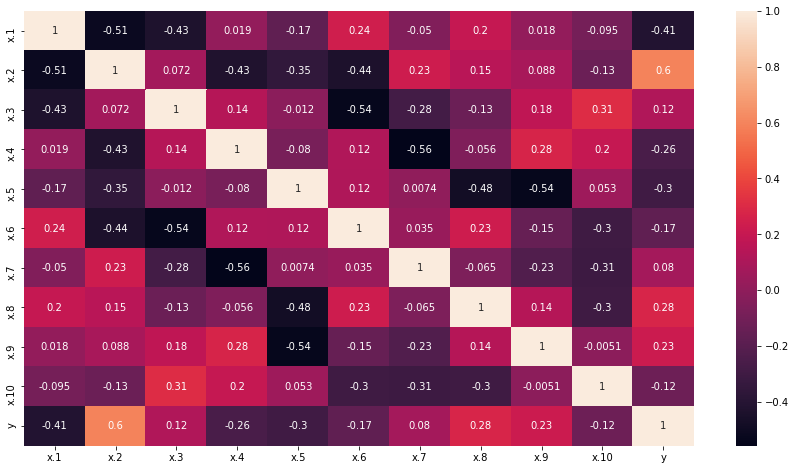

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot=True)

In [ ]:
# Since all Predictors are at different SCALE (check boxplot) ,normalization of data is required to improve the computation speed

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_train = scaler.fit_transform(df_train.drop(columns='y',axis=1))
std_data = pd.DataFrame(std_train)

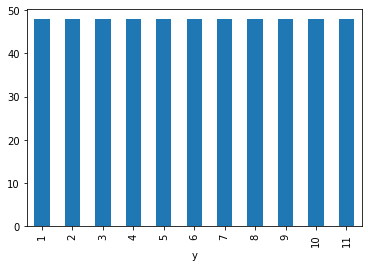

In [ ]:
#Checking the spread of categorial variable across the Data frame

df_gb = df_train.groupby(['y']).size()
df_gb.plot(kind = 'bar')

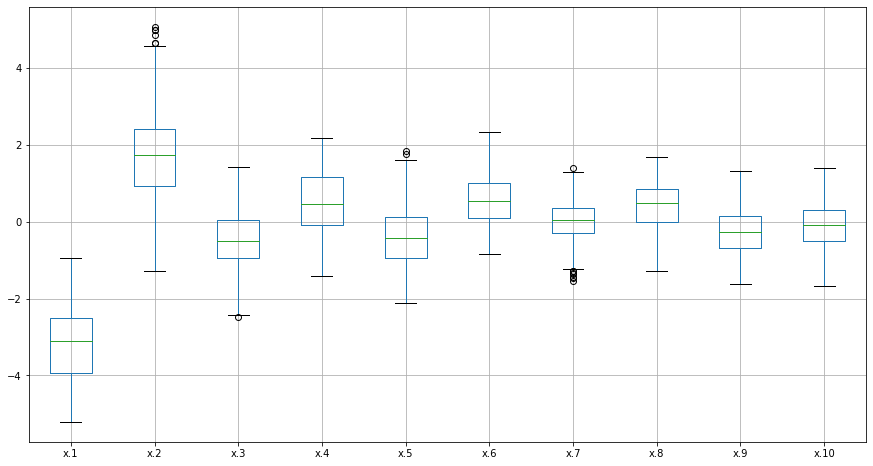

In [ ]:
plt.figure(figsize=(15,8))
df_train.drop(columns='y',axis=1).boxplot()

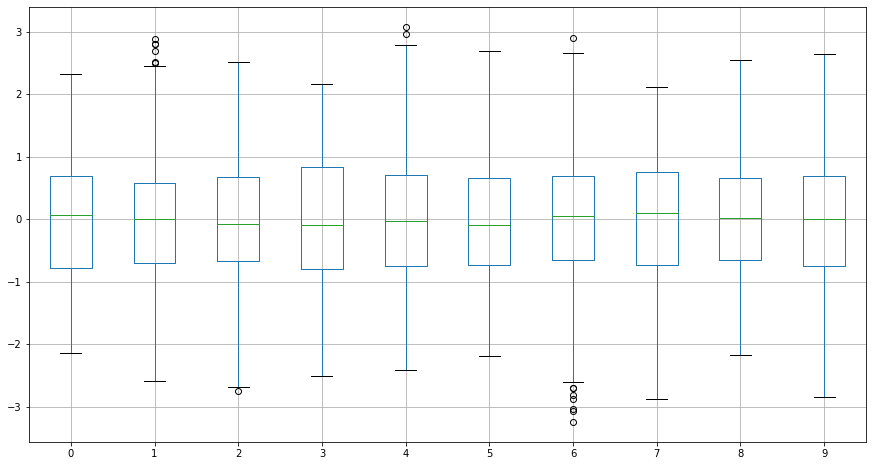

In [ ]:
# This just for confirmation that now all the dependent variables are on the same scale

plt.figure(figsize=(15,8))
std_data.boxplot()

In [ ]:
df_all = df_train.copy()

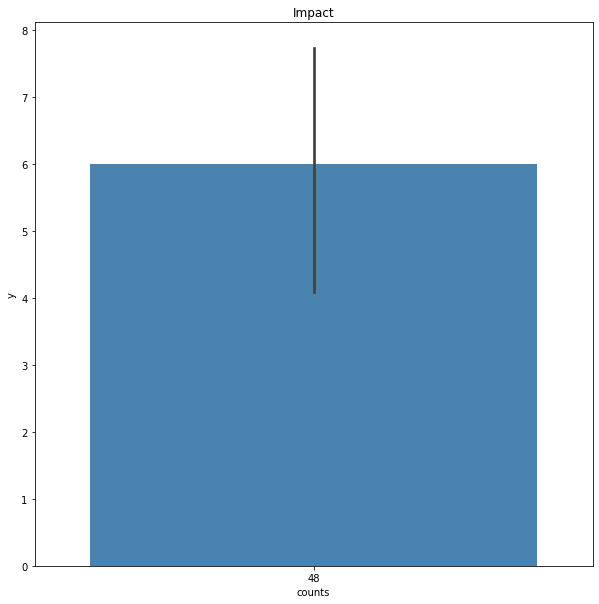

In [ ]:
#Just to check how much impact each independent variable having on dependent varaible,seems its the same for all of them

gr = df_train.groupby(['y']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10,10),nrows=1)
sns.barplot(data=gr, y='y', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Impact')
plt.show()

In [ ]:
std_data

,0,1,2,3,4,5,6,7,8,9
0,-0.493497,-1.135768,-0.299730,1.631492,0.306769,1.608253,-0.846861,0.187568,-0.978822,-1.303054
1,-0.167498,-1.068519,-0.332133,1.092873,0.172294,2.080524,-0.794647,0.155636,-0.570097,-0.720689
2,1.093659,-0.725377,-1.522962,-0.491761,-0.440466,1.503304,-1.245775,0.434621,-0.873814,0.063539
3,0.919166,0.063505,-1.417651,0.633615,-0.920138,0.733162,-1.220712,-0.306536,0.286127,-1.269112
4,0.594212,0.174724,-0.537356,0.698666,-1.724212,0.276325,0.786388,-0.953578,0.880637,-0.556340
...,...,...,...,...,...,...,...,...,...,...
523,-0.938611,0.983436,-0.550857,-0.970533,-0.199244,-0.544748,1.749211,0.362354,-1.912591,0.636972
524,-1.406712,2.180984,-1.389298,-2.101113,0.837735,0.376644,0.677783,0.463191,-0.537786,0.051034
525,-1.550904,2.164603,-0.506302,-1.764151,1.462972,-0.060130,-0.663068,-0.543505,-1.736500,0.481555
526,-1.951089,2.808641,-1.599921,-1.053798,1.091434,-0.623460,-0.477187,-1.555243,-0.024052,0.694136


In [ ]:
# Since it was seen that there was a correlation among the Predictors 
# we can not rule out the PCA option without attempting it 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(std_data)
principalDf = pd.DataFrame(data = principalComponents,columns = ['PC1','PC2'])
finalDf = pd.concat([principalDf, dx_train[['y']]], axis = 1)
finalDf

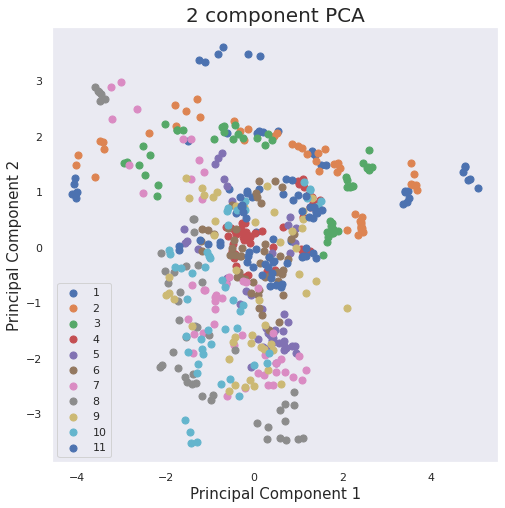

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(dy_train)
#colors = ['r', 'g', 'b']
for target in targets:
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.23316825, 0.21420952])

In [ ]:
# Since there isnot much variation captured in the first two principal components
#Besides, from the below result it is evident that PCA wont add anything good 
# towards the accuracy of the model
# Ruling out PCA 

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# define the pipeline
steps = [('pca', PCA(n_components=2)), ('m', SVC(kernel='rbf', C=100))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, std_data, dy_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.480 (0.058)


In [ ]:
# This is another attempt to manage with the given data
# As there is not Y_test labels available to check the accuracy of model on novel data
# Using the Xtrain file to train(normalized) and test the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(std_data, df_train['y'],test_size=0.2, random_state=42)


Best value of according to Cross-val:  23.10129700083158
CV accuracy:  0.8151162790697674


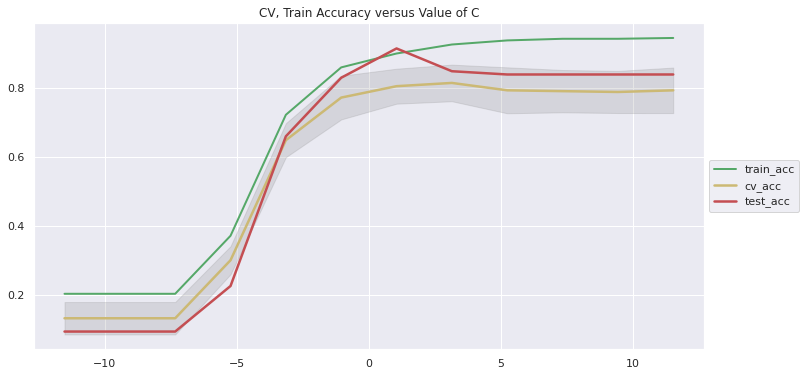

Text(0.5, 3.200000000000003, 'Value of C')

In [ ]:
from sklearn.model_selection import cross_val_score
sns.set()
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC

C_values = np.logspace(-5, 5, num=12, endpoint=True, base=10.0)
#print(C_values)

test_accuracy = []
cross_val_accuracy = []
cross_val_std = []
train_accuracy = []

for C_val in C_values:
  svm = SVC(kernel='linear', C=C_val)
  cv_output = cross_val_score(svm, X_train,y_train, cv=10)
  cross_val_accuracy.append(cv_output.mean())
  cross_val_std.append(cv_output.std())
  svm = SVC(kernel='linear', C=C_val)
  svm.fit(X_train,y_train)
  train_accuracy.append(svm.score(X_train,y_train))
  test_accuracy.append(svm.score(X_test,y_test))
  #print(C_val, cv_output.mean())

cross_val_accuracy = np.array(cross_val_accuracy)
cross_val_std = np.array(cross_val_std)
idx = np.argmax(cross_val_accuracy)
print("Best value of according to Cross-val: ", C_values[idx])
print("CV accuracy: ", cross_val_accuracy[idx])

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.log(C_values),train_accuracy,color='g',lw=2.,label='train_acc')
ax.plot(np.log(C_values),cross_val_accuracy,color='y',lw=2.5,label='cv_acc')
plt.fill_between(np.log(C_values), cross_val_accuracy-cross_val_std, cross_val_accuracy+cross_val_std,color='gray', alpha=0.2)
ax.plot(np.log(C_values),test_accuracy,color='r',lw=2.5,label='test_acc')
plt.title("CV, Train Accuracy versus Value of C")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

ax.set_title("Accuracy versus Value of C")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Value of C")

N CLASSES = 11


Train/Val/Test Accuracy Multiclass (via OVR)

0.556872037914692 0.44339622641509435


[[0.91666667 0.         0.08333333 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.09090909 0.09090909 0.54545455 0.         0.         0.
  0.         0.         0.         0.         0.27272727]
 [0.         0.125      0.5625     0.1875     0.         0.
  0.         0.         0.         0.         0.125     ]
 [0.         0.         0.2        0.8        0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.625      0.25
  0.         0.         0.         0.         0.125     ]
 [0.         0.         0.         0.14285714 0.42857143 0.14285714
  0.         0.         0.         0.         0.28571429]
 [0.         0.         0.         0.11111111 0.44444444 0.11111111
  0.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.22222222 0.         0.     

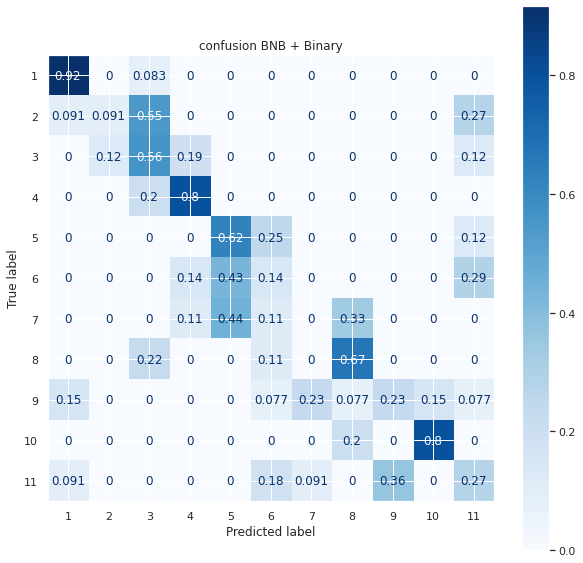

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.svm import SVC
base = SVC(kernel='linear', C=1)

n_classes = len(np.unique(y_train))
MAX_INT = np.iinfo(np.int32).max

print("N CLASSES = %d\n"%n_classes)

clf = OneVsRestClassifier(base).fit(X_train.values, y_train.values)

train_acc = clf.score(X_train.values, y_train.values)
#val_acc = clf.score(X_val.values, y_val.values)
test_acc = clf.score(X_test.values, y_test.values)

print("\nTrain/Val/Test Accuracy Multiclass (via OVR)\n")
print(train_acc,test_acc)

print("\n")
fig, ax = plt.subplots(figsize=(10, 10))
#labels = [number_to_genre[clf.classes_[idx]] for idx in range(n_classes)]
disp = plot_confusion_matrix(clf, X_test.values,y_test.values, cmap=plt.cm.Blues,normalize='true',ax=ax)
disp.ax_.set_title("confusion BNB + Binary")

print(disp.confusion_matrix)


y_pred_test = clf.predict(X_test.values)
macro_prec = precision_score(y_test, y_pred_test, average='macro')
micro_prec = precision_score(y_test, y_pred_test, average='micro')

macro_recall = recall_score(y_test, y_pred_test, average='macro')
micro_recall = recall_score(y_test, y_pred_test, average='micro')

macro_f1 = f1_score(y_test, y_pred_test, average='macro')
micro_f1 = f1_score(y_test, y_pred_test, average='micro')

print("\n")
print("Precision (Macro, Micro)", macro_prec, micro_prec)
print("Recall (Macro, Micro)", macro_recall, micro_recall)
print("F1 (Macro, Micro)", macro_f1, micro_f1)


In [ ]:
#Applying the grid search Cross validation method on the available SPLIT

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters_rbf = {'C': np.logspace(-5, 5, num=11, endpoint=True, base=10.0), 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['rbf','linear','poly']}

svm = SVC()
grid_result_rbf = GridSearchCV(svm, parameters_rbf,return_train_score=True)
grid_result_rbf.fit(X_train,y_train)

means = grid_result_rbf.cv_results_['mean_test_score']
stds = grid_result_rbf.cv_results_['std_test_score']
params = grid_result_rbf.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))#param is a dict with the fields you created
  

print("\nBEST RESULTS FOR NON-LINEAR SVM ...\n")
print("PARAMS: ",grid_result_rbf.best_params_)
print("Cross-validation accuracy: ",grid_result_rbf.best_score_)

svm_nl = SVC(kernel=grid_result_rbf.best_params_['kernel'], gamma=grid_result_rbf.best_params_['gamma'], C=grid_result_rbf.best_params_['C'])
svm_nl.fit(X_train,y_train)
train_accuracy_nl = svm_nl.score(X_train,y_train)
test_accuracy_nl = svm_nl.score(X_test,y_test)

print("Test accuracy: ", test_accuracy_nl )


0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 0.0001, 'kernel': 'rbf'}
0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 0.0001, 'kernel': 'linear'}
0.120812 (0.024022) with: {'C': 1e-05, 'gamma': 0.0001, 'kernel': 'poly'}
0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 0.001, 'kernel': 'rbf'}
0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 0.001, 'kernel': 'linear'}
0.120812 (0.024022) with: {'C': 1e-05, 'gamma': 0.001, 'kernel': 'poly'}
0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 0.01, 'kernel': 'rbf'}
0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 0.01, 'kernel': 'linear'}
0.120812 (0.024022) with: {'C': 1e-05, 'gamma': 0.01, 'kernel': 'poly'}
0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 0.1, 'kernel': 'rbf'}
0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 0.1, 'kernel': 'linear'}
0.120812 (0.024022) with: {'C': 1e-05, 'gamma': 0.1, 'kernel': 'poly'}
0.158515 (0.053068) with: {'C': 1e-05, 'gamma': 1, 'kernel': 'rbf'}
0.160896 (0.054170) with: {'C': 1e-05, 'gamma': 1, 'kernel

For the linear SVM we can observe the Overfitting problem and thus the approach should be changed.




In [ ]:
#Having tried all the available options, its evident that Gridsearch cross validation
#by tuning the hyperparameter on the normalized train data should be used to train the model as data is non linear
#Applying GridsearchCV on OVO
#Capturing the best parameters for the Model

In [ ]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier

parameters_rbf = {'estimator__C': np.logspace(-3, 3, num=10, endpoint=True, base=10.0), 'estimator__gamma': ['auto','scale'], 'estimator__kernel': ['rbf','poly']}
svm = OneVsOneClassifier(SVC(random_state=42))

grid_result_rbf = GridSearchCV(svm, parameters_rbf,return_train_score=True)
grid_result_rbf.fit(std_data,dy_train)
means = grid_result_rbf.cv_results_['mean_test_score']
stds = grid_result_rbf.cv_results_['std_test_score']
params = grid_result_rbf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 
    
print("\nBEST RESULTS FOR NON-LINEAR SVM ...\n")
print("PARAMS: ",grid_result_rbf.best_params_)
print("Cross-validation accuracy: ",grid_result_rbf.best_score_)
svm_nl = SVC(C=grid_result_rbf.best_params_['estimator__C'],gamma=grid_result_rbf.best_params_['estimator__gamma'],kernel=grid_result_rbf.best_params_['estimator__kernel'])
svm_nl.fit(std_data,dy_train)
train_accuracy_nl = svm_nl.score(std_data,dy_train)

0.274519 (0.034600) with: {'estimator__C': 0.001, 'estimator__gamma': 'auto', 'estimator__kernel': 'rbf'}
0.121276 (0.033813) with: {'estimator__C': 0.001, 'estimator__gamma': 'auto', 'estimator__kernel': 'poly'}
0.278329 (0.030085) with: {'estimator__C': 0.001, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
0.121276 (0.033813) with: {'estimator__C': 0.001, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}
0.274519 (0.034600) with: {'estimator__C': 0.004641588833612777, 'estimator__gamma': 'auto', 'estimator__kernel': 'rbf'}
0.121276 (0.033813) with: {'estimator__C': 0.004641588833612777, 'estimator__gamma': 'auto', 'estimator__kernel': 'poly'}
0.278329 (0.030085) with: {'estimator__C': 0.004641588833612777, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
0.121276 (0.033813) with: {'estimator__C': 0.004641588833612777, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}
0.274519 (0.034600) with: {'estimator__C': 0.021544346900318832, 'estimator__gamma':

In [ ]:
#Applying GridsearchCV on OVR
#Capturing the best parameters for the Model

In [ ]:
parameters_rbf = {'estimator__C': np.logspace(-3, 3, num=10, endpoint=True, base=10.0), 'estimator__gamma': ['auto','scale'], 'estimator__kernel': ['rbf','poly']}
svm = OneVsRestClassifier(SVC(random_state=42))

grid_result_rbf = GridSearchCV(svm, parameters_rbf,return_train_score=True)
grid_result_rbf.fit(std_data,dy_train)
means = grid_result_rbf.cv_results_['mean_test_score']
stds = grid_result_rbf.cv_results_['std_test_score']
params = grid_result_rbf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 
    
print("\nBEST RESULTS FOR NON-LINEAR SVM ...\n")
print("PARAMS: ",grid_result_rbf.best_params_)
print("Cross-validation accuracy: ",grid_result_rbf.best_score_)
svm_nl = SVC(C=grid_result_rbf.best_params_['estimator__C'],gamma=grid_result_rbf.best_params_['estimator__gamma'],kernel=grid_result_rbf.best_params_['estimator__kernel'])
svm_nl.fit(std_data,dy_train)
train_accuracy_nl = svm_nl.score(std_data,dy_train)

0.545211 (0.087694) with: {'estimator__C': 0.001, 'estimator__gamma': 'auto', 'estimator__kernel': 'rbf'}
0.450620 (0.069246) with: {'estimator__C': 0.001, 'estimator__gamma': 'auto', 'estimator__kernel': 'poly'}
0.543324 (0.106420) with: {'estimator__C': 0.001, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
0.452525 (0.070798) with: {'estimator__C': 0.001, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}
0.568122 (0.097728) with: {'estimator__C': 0.004641588833612777, 'estimator__gamma': 'auto', 'estimator__kernel': 'rbf'}
0.465786 (0.061752) with: {'estimator__C': 0.004641588833612777, 'estimator__gamma': 'auto', 'estimator__kernel': 'poly'}
0.566217 (0.095294) with: {'estimator__C': 0.004641588833612777, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
0.463881 (0.060956) with: {'estimator__C': 0.004641588833612777, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}
0.560539 (0.097219) with: {'estimator__C': 0.021544346900318832, 'estimator__gamma':

In [ ]:
# The model is ready with the best parameters after previous two runs
#Applying the trained model on unlabelled dx_test data which would be saved in the CSV file and 
#compared against the results which are  preserved  and not shared 

From the previous two runs its evident  that the model with the best cross-validation accuracy is a non-linear SVM with RBF kernel and C=46. The estimated accuracy of this model on new data is 0.659 which is slighty lesse than the estimated accuracy of the linear model of the previous section (0.6893).

Using the combination of non-linear SVM we which also takes care of the overfitting probmlem we can apply prediction on the dx_test.

In [ ]:
#parameters_rbf = {'estimator__C': np.logspace(-3, 3, num=10, endpoint=True, base=10.0), 'estimator__gamma': ['auto','scale'], 'estimator__kernel': ['rbf','poly']}

best_svm = SVC(kernel='rbf', C=46)
best_svm.fit(std_data,dy_train)
predictions = best_svm.predict(dx_test)

In [ ]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('BBS21-ML-Exam-SVM-Sagar-Gahalod.csv')

## Neural Nets

The code below downloads the IMDB dataset. This version of the dataset contains 25.000 movies reviews from IMDB, labeled by sentiment (positive/negative). The dataset is already separated into a test and training set, but to reduce training times. The test data could be modified during the assessment of your solution to evaluate the robustness of your model, so take care with overfitting.


In [ ]:
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   

num_words=10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0) #1 is positive

np.random.seed(742021)
msk_train = np.random.rand(len(x)) < 0.5
msk_test = ~msk_train

#retrieve the mapping from words to indices
word_index = imdb.get_word_index()

#create the reverse mapping: from indices to words
rev_word_index = {idx:w for w,idx in word_index.items()}

def decode_sentence(s):
    # index 0 to 2 are reserved for padding, unknown word, etc.
    decoded_sent = [rev_word_index.get(idx-3, '') for idx in s]
    return ' '.join(decoded_sent)


### **Task 1**

Implement a classic neural net to classify the IMDB data assumming you want to maximize the average accuracy of the model among the different classes. Give a comprehensive and clear description of your architecture and training parameters. Estimate its future performance on each class.

You will be assessed considering: (i) the accuracy and clarity of your explanation, (ii) the margin of improvement with respect the 3-layer baseline model published as solution to the exam's simulation. 



In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

stemmer = SnowballStemmer("english") 
lemmatizer = WordNetLemmatizer()

def decode_sentence(s):#this function pre-process the words in a text
    decoded_sent = []
    for idx in s:
       word = rev_word_index.get(idx-3, '')
       token = word.lower().strip().strip('-').strip('_')
       token_pro = lemmatizer.lemmatize(token)
       decoded_sent.append(token_pro)
    return ' '.join(decoded_sent)

texts = [decode_sentence(x[idx]) for idx in range(len(x))]

#here you convert the words to vectors
TF_tokenizer = Tokenizer(num_words=5000)
TF_tokenizer.fit_on_texts(texts)
vectors = TF_tokenizer.texts_to_matrix(texts, mode='freq')#binary', 'count', 'tfidf'
print(vectors.shape)

vectors_train = vectors[msk_train]
vectors_test = vectors[msk_test]
y_train = y[msk_train]
y_test = y[msk_test]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(50000, 5000)


#### **Solution 1**

First , we start with dividing the training data into "Training" and "Validataion" data.
As a general practice holding 25% of the training data for the validation before applying the model to the testing dataset . The remaining training data is used for evaluating different variations of the baseline architecture.

**The architecture desinged for classical CNN composed below layers and parameters. **

1.   Using 100 hidden neurons with ReLU activation function 

2.   There is a dropout of 0.2 ,0.3,0.2 sequencially in between input layer and output layer

3.  The best Optimizer algorithm in this case can be 'Adam' which adapt the learning rate during back-propogation.






In [ ]:
print(vectors_train.shape, vectors_test.shape)
print(y_train.shape, y_test.shape)
print(len(vectors_train))

(18919, 5000) (24919, 5000)
(18919,) (24919,)
18919


In [ ]:
msk_train_ = np.random.rand(len(vectors_train)) < 0.75
msk_val_ = ~msk_train_

vectors_train_ = vectors_train[msk_train_]
vectors_val = vectors_train[msk_val_]
y_train_ = y_train[msk_train_]
y_val = y_train[msk_val_]

vectors_train = vectors_train_
y_train = y_train_

#here you have vectors
print(vectors_train.shape, vectors_val.shape, vectors_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(18725, 5000) (6356, 5000) (24919, 5000)
(18725,) (6356,) (24919,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.layers import Dropout

def ff_model(num_features=5000, nlayers=1, nneurons=120):

  model = Sequential()
  for idx in range(nlayers):
    model.add(Dense(nneurons, input_shape=(num_features,), activation="relu"))
  
  Dropout(0.3)

  model.add(Dense(60, activation = "relu"))

  Dropout(0.2)

  model.add(Dense(20, activation = "relu"))

  #Dropout(0.3)

  model.add(Dense(1,activation="sigmoid"))

  opt = Adam()
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

  return model

print(np.unique(y_train))
model_FF = ff_model(num_features=5000)
history_FF = model_FF.fit(vectors_train, y_train, batch_size=100, epochs=5, verbose=2, validation_data=(vectors_val, y_val))


[0 1]
Epoch 1/5
188/188 - 3s - loss: 0.5263 - accuracy: 0.7744 - val_loss: 0.3137 - val_accuracy: 0.8693
Epoch 2/5
188/188 - 2s - loss: 0.2579 - accuracy: 0.9003 - val_loss: 0.2681 - val_accuracy: 0.8916
Epoch 3/5
188/188 - 2s - loss: 0.2095 - accuracy: 0.9226 - val_loss: 0.2744 - val_accuracy: 0.8919
Epoch 4/5
188/188 - 2s - loss: 0.1843 - accuracy: 0.9309 - val_loss: 0.3567 - val_accuracy: 0.8647
Epoch 5/5
188/188 - 2s - loss: 0.1672 - accuracy: 0.9392 - val_loss: 0.3023 - val_accuracy: 0.8856



From these curves, we conclude that the baseline model overfits the training data. The training loss/accuracy improves monotonically as a function of the number of epochs. However, very soon, around epoch 5, the validation loss/accuracy starts to worsen almost monotonically with very small fluctuations.

After studying the confusion matrix of the final model, we can conclude that the trained model predicts both classes with a quite similar accuracy, precision, and recall

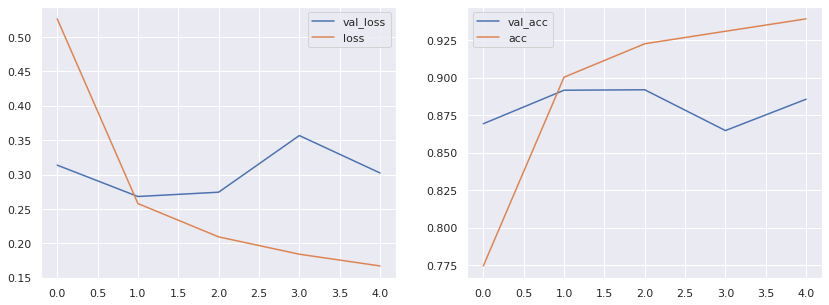

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(14,5))
axis[0].plot(history_FF.history['val_loss'], label='val_loss')
axis[0].plot(history_FF.history['loss'], label='loss')
axis[0].legend()
axis[1].plot(history_FF.history['val_accuracy'], label='val_acc')
axis[1].plot(history_FF.history['accuracy'], label='acc')
axis[1].legend()
plt.show()


FINAL TRAIN ACCURACY:  0.956154873164219

FINAL VAL ACCURACY:  0.8856198867212083

FINAL TEST ACCURACY:  0.8808940968738713

Confusion Matrix



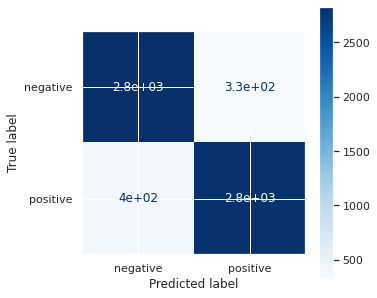


Classification Report

              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      3155
    positive       0.90      0.88      0.89      3201

    accuracy                           0.89      6356
   macro avg       0.89      0.89      0.89      6356
weighted avg       0.89      0.89      0.89      6356



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_train = model_FF.predict(vectors_train).round().astype(int)[:,0]
y_pred_val = model_FF.predict(vectors_val).round().astype(int)[:,0]
y_pred_test = model_FF.predict(vectors_test).round().astype(int)[:,0]

acc_train = np.mean(y_train == y_pred_train)
acc_val = np.mean(y_val == y_pred_val)
acc_test = np.mean(y_test == y_pred_test)

print("\nFINAL TRAIN ACCURACY: " , acc_train )
print("\nFINAL VAL ACCURACY: " , acc_val )
print("\nFINAL TEST ACCURACY: " , acc_test )

target_names = [str(i) for i in range(10)]

class_names = ['negative', 'positive']

print("\nConfusion Matrix\n")
fig, ax = plt.subplots(figsize=(5, 5))
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

print("\nClassification Report\n")

print(classification_report(y_val, y_pred_val, target_names=class_names))


### **Task 2**

2.  Implement a convolutional neural net to classify the IMDB data. Motivate your approach, providing a clear description of your architecture. Stress the differences of this model with respect to the classic model you built in 1) and the recurrent model presented as solution to the exam's simulation. Estimate the future model's performance. 

You will be assessed considering: (i) the accuracy and clarity of your explanation, (ii) the margin of improvement with respect to the models presented as solution to the exam's simulation. 


#### **Solution 2**

The next approach is to adjust the depth and number of neurons and obtain a trade off . 

From the observation of the training history of the previous run ,it can be concluded that reducing the number of hidden layer between 1-0 leads to underfitting. By increasing the number of hidden layers training accuracy does not change much but there is declining trend introduced with respect to the validation (testing) accuracy. 



In [ ]:
depths = [0,1,2,3,4]

histories_depth = []

for depth in depths: 
  model_FF = ff_model(num_features=5000, nlayers=depth, nneurons=100)
  history_FF = model_FF.fit(vectors_train, y_train, batch_size=100, epochs=5, verbose=0, validation_data=(vectors_val, y_val))
  histories_depth.append(history_FF)
  

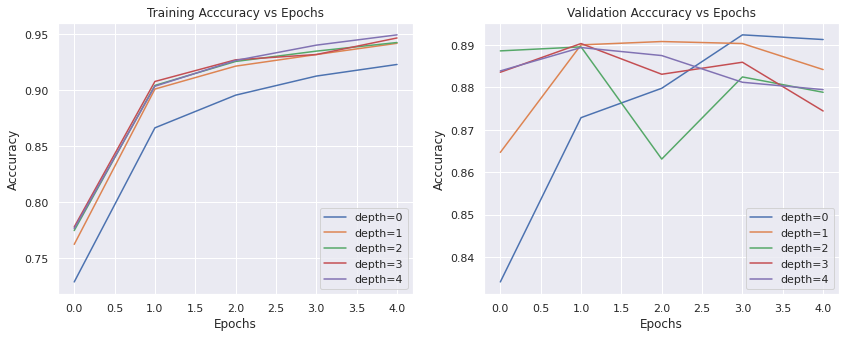

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(14,5))

for idx,depth in enumerate(depths):
    axis[0].plot(histories_depth[idx].history['accuracy'], label='depth='+str(depth))
    axis[1].plot(histories_depth[idx].history['val_accuracy'], label='depth='+str(depth))

axis[0].set_title("Training Acccuracy vs Epochs")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Acccuracy")

axis[1].set_title("Validation Acccuracy vs Epochs")
axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Acccuracy")

axis[0].legend(loc='lower right')
axis[1].legend(loc='lower right')
plt.show()

Continuing the adjustment with the number of neurons it between 25 to 500 
it is observed by increasing the number of neurons leads to overfitting: the training accuracy did not improve much on the other hand validation accuracy has declined.


In [ ]:
nneurons = [25,50,100,200,500]

histories_neurons = []

for nneuron in nneurons: 
  model_FF = ff_model(num_features=5000, nlayers=1, nneurons=nneuron)
  history_FF = model_FF.fit(vectors_train, y_train, batch_size=100, epochs=5, verbose=0, validation_data=(vectors_val, y_val))
  histories_neurons.append(history_FF)


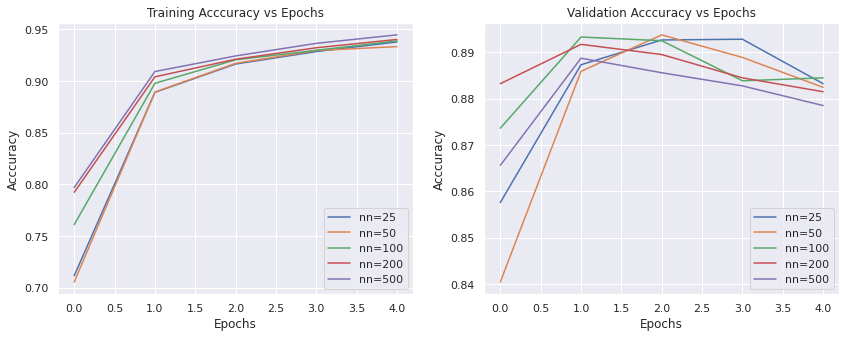

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(14,5))

for idx,nneuron in enumerate(nneurons):
    axis[0].plot(histories_neurons[idx].history['accuracy'], label='nn='+str(nneuron))
    axis[1].plot(histories_neurons[idx].history['val_accuracy'], label='nn='+str(nneuron))

axis[0].set_title("Training Acccuracy vs Epochs")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Acccuracy")

axis[1].set_title("Validation Acccuracy vs Epochs")
axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Acccuracy")

axis[0].legend(loc='lower right')
axis[1].legend(loc='lower right')
plt.show()

In [ ]:
! pip install h5py

Implementing "early stopping" on a validation set, that is, stopping the training procedure once the model's accuracy stops improving (or starts worsening) on the validation dataset. This strategy can be improved by allowing the training to continue a given number of iterations (patience) after the point of no improvement has been found. 

We combined this strategy with a model checkpoint tool which saves the best model found observed during training for later use. 

Using a patience of 0, these methods allowed us to improve the accuracy of the baseline model by about 2% whereas there is no improvement in validation which was already reached to the pick by the virtue of previous tradeoff. 

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model_FF = ff_model(num_features=5000, nlayers=1, nneurons=25)
history_FF = model_FF.fit(vectors_train, y_train, batch_size=100, epochs=5, verbose=0, validation_data=(vectors_val, y_val), callbacks=[es, mc])
saved_model = load_model('best_model.h5')


Epoch 00001: val_accuracy improved from -inf to 0.86768, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.86768 to 0.89191, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.89191

Epoch 00004: val_accuracy did not improve from 0.89191
Epoch 00004: early stopping



FINAL TRAIN ACCURACY:  0.9218157543391188

FINAL VAL ACCURACY:  0.8919131529263687

FINAL TEST ACCURACY:  0.8835828082988884

Confusion Matrix



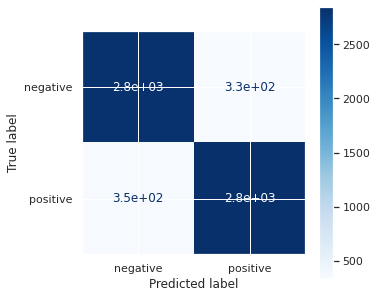


Classification Report

              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      3155
    positive       0.90      0.89      0.89      3201

    accuracy                           0.89      6356
   macro avg       0.89      0.89      0.89      6356
weighted avg       0.89      0.89      0.89      6356



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


model_FF = saved_model
y_pred_train = model_FF.predict(vectors_train).round().astype(int)[:,0]
y_pred_val = model_FF.predict(vectors_val).round().astype(int)[:,0]
y_pred_test = model_FF.predict(vectors_test).round().astype(int)[:,0]

acc_train = np.mean(y_train == y_pred_train)
acc_val = np.mean(y_val == y_pred_val)
acc_test = np.mean(y_test == y_pred_test)

print("\nFINAL TRAIN ACCURACY: " , acc_train )
print("\nFINAL VAL ACCURACY: " , acc_val )
print("\nFINAL TEST ACCURACY: " , acc_test )

target_names = [str(i) for i in range(10)]

class_names = ['negative', 'positive']

print("\nConfusion Matrix\n")
fig, ax = plt.subplots(figsize=(5, 5))
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

print("\nClassification Report\n")

print(classification_report(y_val, y_pred_val, target_names=class_names))

The following steps are executed to check if using recurrent network like LSTM can improve the accuracy in prediction 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D, SimpleRNN
from tensorflow.keras.layers import Embedding,Bidirectional,Conv1D

num_words=10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0) #1 is positive

x_train = x[msk_train]
x_test = x[msk_test]
y_train = y[msk_train]
y_test = y[msk_test]

msk_train_ = np.random.rand(len(x_train)) < 0.75
msk_val_ = ~msk_train_

x_train_ = x_train[msk_train_]
x_val = x_train[msk_val_]
y_train_ = y_train[msk_train_]
y_val = y_train[msk_val_]



In [ ]:
x_train = x_train_
y_train = y_train_

#these three lines, creates sequences of the same size: maxlen
max_len = 100
x_train_padded = pad_sequences(x_train, maxlen=max_len)
x_val_padded = pad_sequences(x_val, maxlen=max_len)
x_test_padded = pad_sequences(x_test, maxlen=max_len)

print(x_train_padded.shape)
print(x_val_padded.shape)
print(x_test_padded.shape)

def recurrent_model():
  embedding_vector_length = 100
  model = Sequential()
  model.add(Embedding(num_words, embedding_vector_length, input_length=max_len))
  model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5, return_sequences=False))
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
  print(model.summary())
 
  return model

model_LSTM = recurrent_model()


(18712, 100)
(6369, 100)
(24919, 100)
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dropout_92 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_165 (Dense)            (None, 1)                 51        
Total params: 1,030,251
Trainable params: 1,030,251
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_LSTM = recurrent_model()
history_LSTM = model_LSTM.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_data=(x_val_padded,y_val))



Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_93 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 1)                 51        
Total params: 1,030,251
Trainable params: 1,030,251
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
585/585 [==============================] - 82s 133ms/step - loss: 0.5666 - accuracy: 0.6807 - val_loss: 0.3834 - val_accuracy: 0.8351
Epoch 2/10
585/585 [==============================] - 78s 133ms/step - loss: 0.2937 - accur

In [ ]:
result = model.evaluate(x_test_padded, y_test)

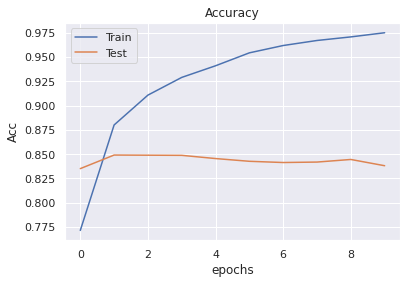

In [ ]:
plt.figure()
plt.plot(history_LSTM.history["accuracy"], label = "Train")
plt.plot(history_LSTM.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

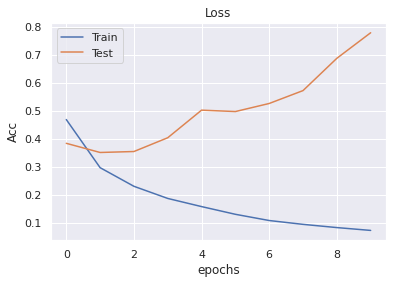

In [ ]:


plt.figure()
plt.plot(history_LSTM.history["loss"], label = "Train")
plt.plot(history_LSTM.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()



### Solution 2 -> conclusion
From the above execution it can be concluded that for this classifation problem CNN and RNN both work best when it comes to training data.
Whereas with proper selection of hyper parameter and striking perfect combination of layers can improve the accuracy for Validation(test) through CNN.

# Final Bonus

- If you present your methods and results in a short youtube video you will get a bonus of 100-150 points. This bonus will be added to your final exam score with a weight of 10% as other bonuses. 

- If you decide to prepare this video please add the link to your moodle submission. In this case, I could use the notebook to check consistency, but I will follow the discussion presented in the video.
